# **Praktikum II & III Machine Learning dan Modern Prediction**


=================================================

Nama  : Athaya Fairuzindah

NPM : F1F022039

REGRESSION TREE DAN K-NEAREST NEIGHBORS
=================================================

# Latar Belakang

Metode machine learning seperti Regression Tree dan K-Nearest Neighbors (KNN) telah menjadi alat prediksi yang sangat populer di berbagai bidang, terutama dalam analisis penjualan otomotif. Regression Tree, yang merupakan bagian dari metode CART (Classification and Regression Tree) yang dikembangkan oleh Breiman dkk. (1984), mempartisi data secara rekursif dan menghasilkan model yang sangat mudah diinterpretasi, sehingga banyak digunakan dalam prediksi dengan data yang kompleks dan pola yang tidak linear. Pendekatan ini terbukti efektif menangkap hubungan antar variabel secara non-parametrik tanpa asumsi distribusi tertentu.

KNN, pertama kali diperkenalkan oleh Cover dan Hart (1967), mengklasifikasikan atau memprediksi data baru berdasarkan kemiripan terhadap sejumlah “tetangga” terdekatnya dalam ruang fitur. Keunggulan utama KNN terletak pada kesederhanaannya, tidak memerlukan model pelatihan yang rumit, serta fleksibel untuk berbagai tipe data—namun kinerja KNN sangat bergantung pada pemilihan nilai k dan proses normalisasi data. Pada kasus regresi, KNN melakukan prediksi dengan mengambil rata-rata nilai k tetangga terdekat, dan telah diaplikasikan pada prediksi penjualan dengan hasil yang kompetitif untuk dataset tertentu.

Dalam bidang prediksi penjualan otomotif, baik Regression Tree maupun KNN telah digunakan untuk memperkirakan permintaan dan merumuskan strategi bisnis. Data penjualan BMW yang digunakan dalam penelitian ini memberikan peluang untuk menguji kedua metode tersebut dan membandingkan performanya dalam konteks prediktif. Studi-studi terdahulu menunjukkan Regression Tree sering unggul dalam interpretabilitas dan identifikasi faktor penting penentu penjualan, sementara KNN menonjol dalam akurasi pada data dengan pola lokal yang kuat. Kombinasi atau perbandingan kedua algoritma ini diharapkan dapat memberikan pemahaman komprehensif tentang prediksi penjualan berbasis machine learning di industri otomotif.

# Rumusan Masalah

Adapun rumusan masalah penelitian kali ini yaitu:
1. Apa konsep dasar algoritma Decision Tree?
2. Bagaimana cara membedakan antara Classification Tree dan Regression Tree?
3. Bagaimana cara menerapkan Decision Tree untuk klasifikasi?
4. Bagaimana cara melakukan evaluasi model Decision Tree menggunakan confusion matrix dan accuracy score?
5. Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
6. Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.
7. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
8. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
9. Mengevaluasi performa model KNN menggunakan accuracy score dan
confusion matrix

# Tujuan Penelitian

Adapun tujuan penelitian kali ini yaitu:
Adapun rumusan masalah penelitian kali ini yaitu:
1. Menjelaskan konsep dasar algoritma Decision Tree.
2. Membedakan antara Classification Tree dan Regression Tree.
3. Menerapkan Decision Tree untuk klasifikasi.
4. Melakukan evaluasi model Decision Tree menggunakan confusion matrix dan
accuracy score.
5. Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
6. Melatih kemampuan analisis melalui latihan mandiri menggunakan dataset lain.
7. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
8. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
9. Mengevaluasi performa model KNN menggunakan accuracy score dan
confusion matrix

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 146.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 14.7 MB/s eta 0:00:00


In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,  OrdinalEncoder, LabelEncoder,  StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Memuat Data

Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini. Data yang digunakan pada penelitian merupakan data skunder yang yang diberikan oleh Asisten Praktikum pada link berikut  https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv .

In [ ]:

bmw_df = pd.read_csv(' https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv', sep=';')
bmw_df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080
...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486


# Melihat Tipe Data

In [ ]:
bmw_df.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


# Cek _Missing Value_

In [ ]:
# Check Missing Values
bmw_df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


# Statistik Deskriptif Data

In [ ]:
print(bmw_df.describe())

               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000


# _Feature Engineering_

## A- Splitting Data

Sebelum dilakukan analis langkah yang perlu dilakukan terlebih dahulu yaitu splitting atau membagi data.

In [ ]:
#mendeskripsikan variabel X dan y
X = bmw_df.drop('Sales_Volume', axis = 1)
y = bmw_df['Sales_Volume']

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=200)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)


Train size :  (37500, 9)
Test size  :  (12500, 9)


Data tersebut baik variabel X dan Variabel Y dipisah menjadi data training dan data testing dengan perbandingan 75% Training : 25% Testing. Diperoleh X_train dan Y_train untuk data training serta X_test dan y_test untuk data testing.

### B- Scaling

Tahapan selanjutnya yaitu dilakukan scalling, yang bertujuan untuk menyamakan rentang nilai (skala) dari fitur-fitur numerik yang berbeda. Scaling didefinisikan sebagai proses transformasi matematis pada data numerik untuk menempatkannya dalam skala yang umum, biasanya dalam rentang [0, 1] untuk Normalization (Min-Max Scaling) atau dengan rata-rata 0 dan standar deviasi 1 untuk Standardization (Z-score Scaling), guna mempercepat konvergensi algoritma dan meningkatkan performa model secara keseluruhan.

In [ ]:
# Identify numerical features directly from X_train
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize lists to store feature names based on skewness
nilai_skew = []
nilai_skew_normal = []

# Calculate skewness for each numerical feature in X_train
print("Calculating skewness for numerical features in X_train:")
for feature in numerical_features:
    skewness = X_train[feature].skew()
    print(f"  {feature}: {skewness:.4f}")
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(feature)
    else:
        nilai_skew.append(feature)

# Display the categorized features
print('\nKolom yang mempunyai nilai skewness sedang (skewed):', nilai_skew)
print('Kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

Calculating skewness for numerical features in X_train:
  Year: -0.0108
  Engine_Size_L: -0.0075
  Mileage_KM: -0.0079
  Price_USD: 0.0075

Kolom yang mempunyai nilai skewness sedang (skewed): []
Kolom yang mempunyai nilai skewness normal: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']


In [ ]:

numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']
scaler = StandardScaler()

# Apply fit_transform to X_train for numerical columns
X_train_scaled = X_train.copy() # Create a copy to avoid modifying original X_train directly if not intended
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply transform to X_test for numerical columns
X_test_scaled = X_test.copy() # Create a copy to avoid modifying original X_test directly if not intended
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train and X_test have been scaled using StandardScaler.")
print("X_train_scaled head:\n", X_train_scaled[numerical_cols].head())
print("X_test_scaled head:\n", X_test_scaled[numerical_cols].head())

Numerical features in X_train and X_test have been scaled using StandardScaler.
X_train_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
28475 -0.473404       0.545830    1.243500  -1.039395
10801 -1.166587       0.545830    1.507087  -0.504411
10124 -1.397648      -0.246990   -1.310046   0.076110
4822  -1.166587      -0.346092    1.436374   1.015719
21632 -0.473404      -0.841605    0.712481   0.823966
X_test_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
20518  0.681901       0.744035   -1.218395  -1.583478
20570 -0.704465       1.437753   -1.325379   0.458581
38530  1.375084      -0.048785   -1.577341   0.601264
39945 -0.242343       0.644933    0.781107  -0.668212
1713  -0.242343      -0.643400   -1.340367  -1.698745


Menggunakan standar scaler untuk dataset yang digunakan memiliki skala yang seragam dengan rataan mendekati 0 dan standar deviasi mendekati 1.

# Analisis Data Eksploratif

### Distribusi Variabel Y

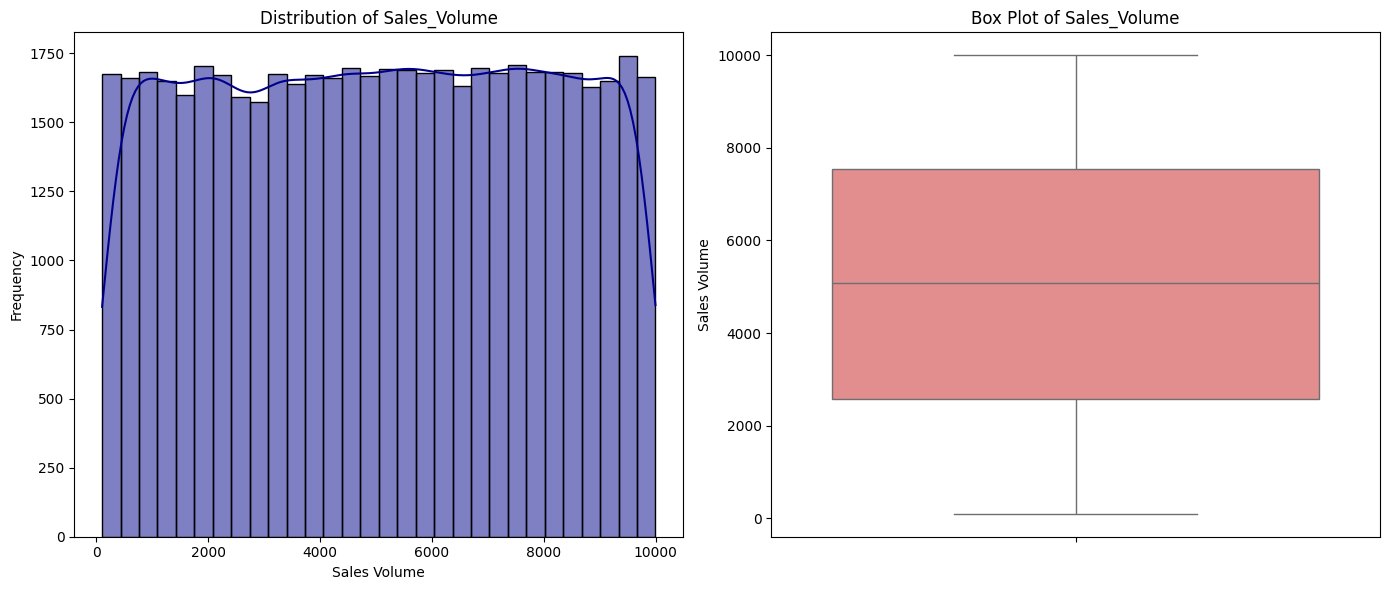

In [ ]:
# Set up the figure and axes for subplots
plt.figure(figsize=(14, 6))

# Histogram for Sales_Volume
plt.subplot(1, 2, 1)
sns.histplot(bmw_df['Sales_Volume'], kde=True, bins=30, color='darkblue')
plt.title('Distribution of Sales_Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')

# Box plot for Sales_Volume
plt.subplot(1, 2, 2)
sns.boxplot(y=bmw_df['Sales_Volume'], color='lightcoral')
plt.title('Box Plot of Sales_Volume')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

Visualisasi menggunakan histogram dan box plot menunjukkan bahwa `Sales_Volume` memiliki distribusi yang cenderung seragam, dengan nilai penjualan tersebar cukup merata antara batas minimum dan maksimum. Ini mengindikasikan tidak adanya konsentrasi penjualan yang ekstrem pada nilai-nilai tertentu, serta relatif sedikit outlier yang signifikan.

### Perbandingan Distribusi Variabel Y dan X

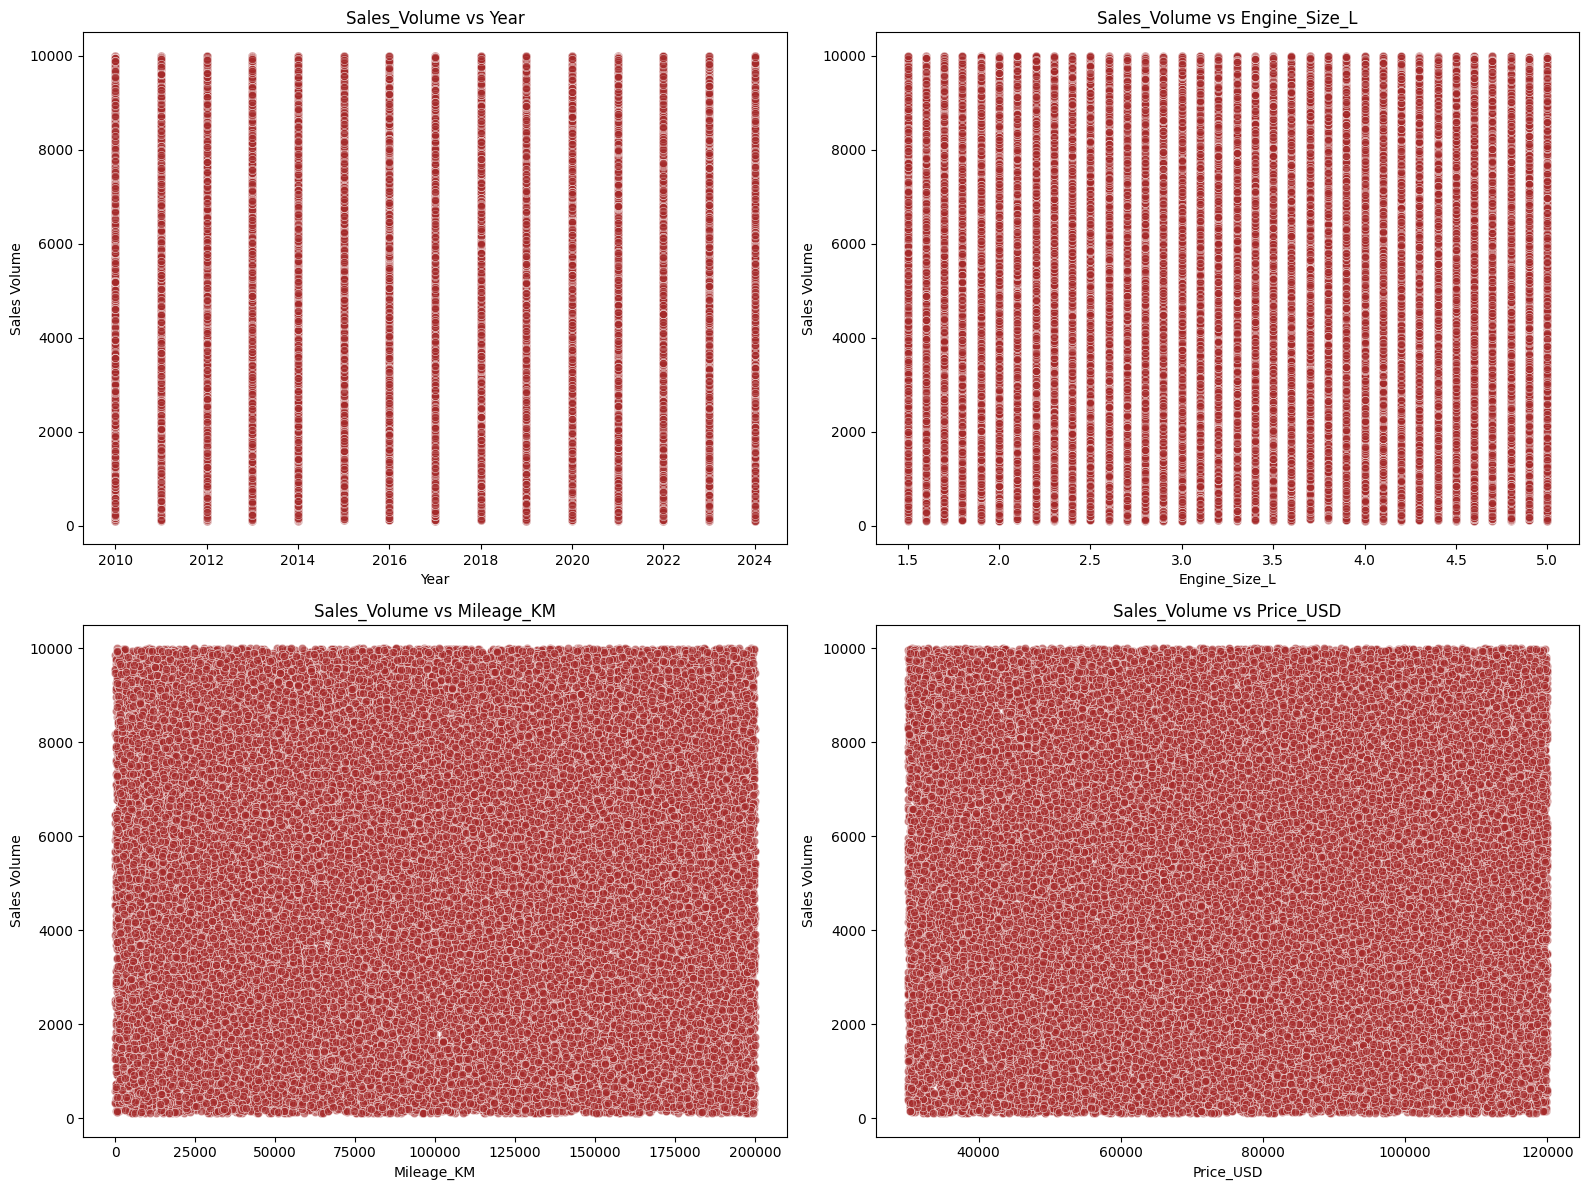

In [ ]:
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=bmw_df[feature], y=bmw_df['Sales_Volume'], color='brown', alpha=0.6)
    plt.title(f'Sales_Volume vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()


Scatter plot antara `Sales_Volume` dengan `Year`, `Engine_Size_L`, `Mileage_KM`, dan `Price_USD` menunjukkan bahwa tidak ada korelasi linear yang kuat antara `Sales_Volume` dengan fitur-fitur numerik ini. Matriks korelasi mengkonfirmasi bahwa koefisien korelasi Pearson antara `Sales_Volume` dan fitur numerik lainnya sangat mendekati nol, menunjukkan bahwa hubungan linear langsung antar variabel ini lemah atau tidak ada.

### Korelasi Variabel Y dan X

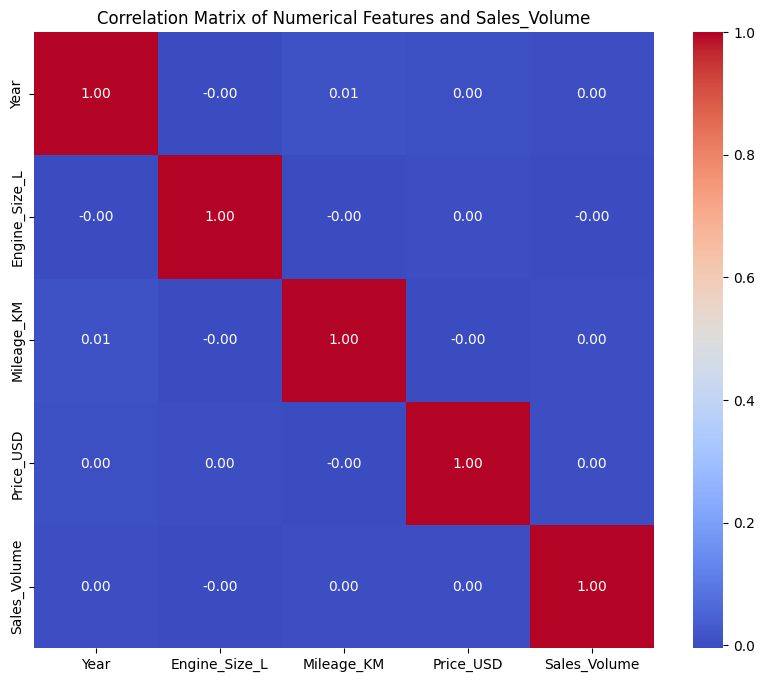

In [ ]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
correlation_matrix = bmw_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Sales_Volume')
plt.show()

Ketika heatmap menunjukkan bahwa tidak ada korelasi yang signifikan antara variabel prediktor (X: 'Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD') dan variabel respons (Y: 'Sales_Volume'), ini memiliki implikasi penting terhadap kinerja model regresi seperti Decision Tree dan K-Nearest Neighbors (KNN):

Untuk Regression Tree: Model Decision Tree bekerja dengan membagi data menjadi sub-wilayah berdasarkan fitur-fitur yang paling informatif untuk memprediksi nilai target.

Untuk K-Nearest Neighbors (KNN): Model KNN untuk regresi memprediksi nilai target suatu titik data baru dengan mengambil rata-rata nilai target dari 'k' tetangga terdekatnya dalam ruang fitur.

Implikasi terhadap Performa Model: Kedua model (Decision Tree dan KNN) akan kesulitan untuk menangkap pola yang mendasari data, yang tercermin dari metrik kesalahan (MAE, MSE, RMSE) yang relatif tinggi, seperti yang terlihat pada hasil perbandingan model Anda. Ini mengindikasikan bahwa model-model tersebut tidak mampu membuat prediksi yang akurat karena tidak ada 'sinyal' yang cukup kuat dalam fitur-fitur yang diberikan untuk memprediksi 'Sales_Volume'.

# _Training Model_

In [ ]:
# Initialize and train the DecisionTreeRegressor model
reg_tree_model = DecisionTreeRegressor(random_state=42)
reg_tree_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Initialize and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

KNeighborsRegressor()

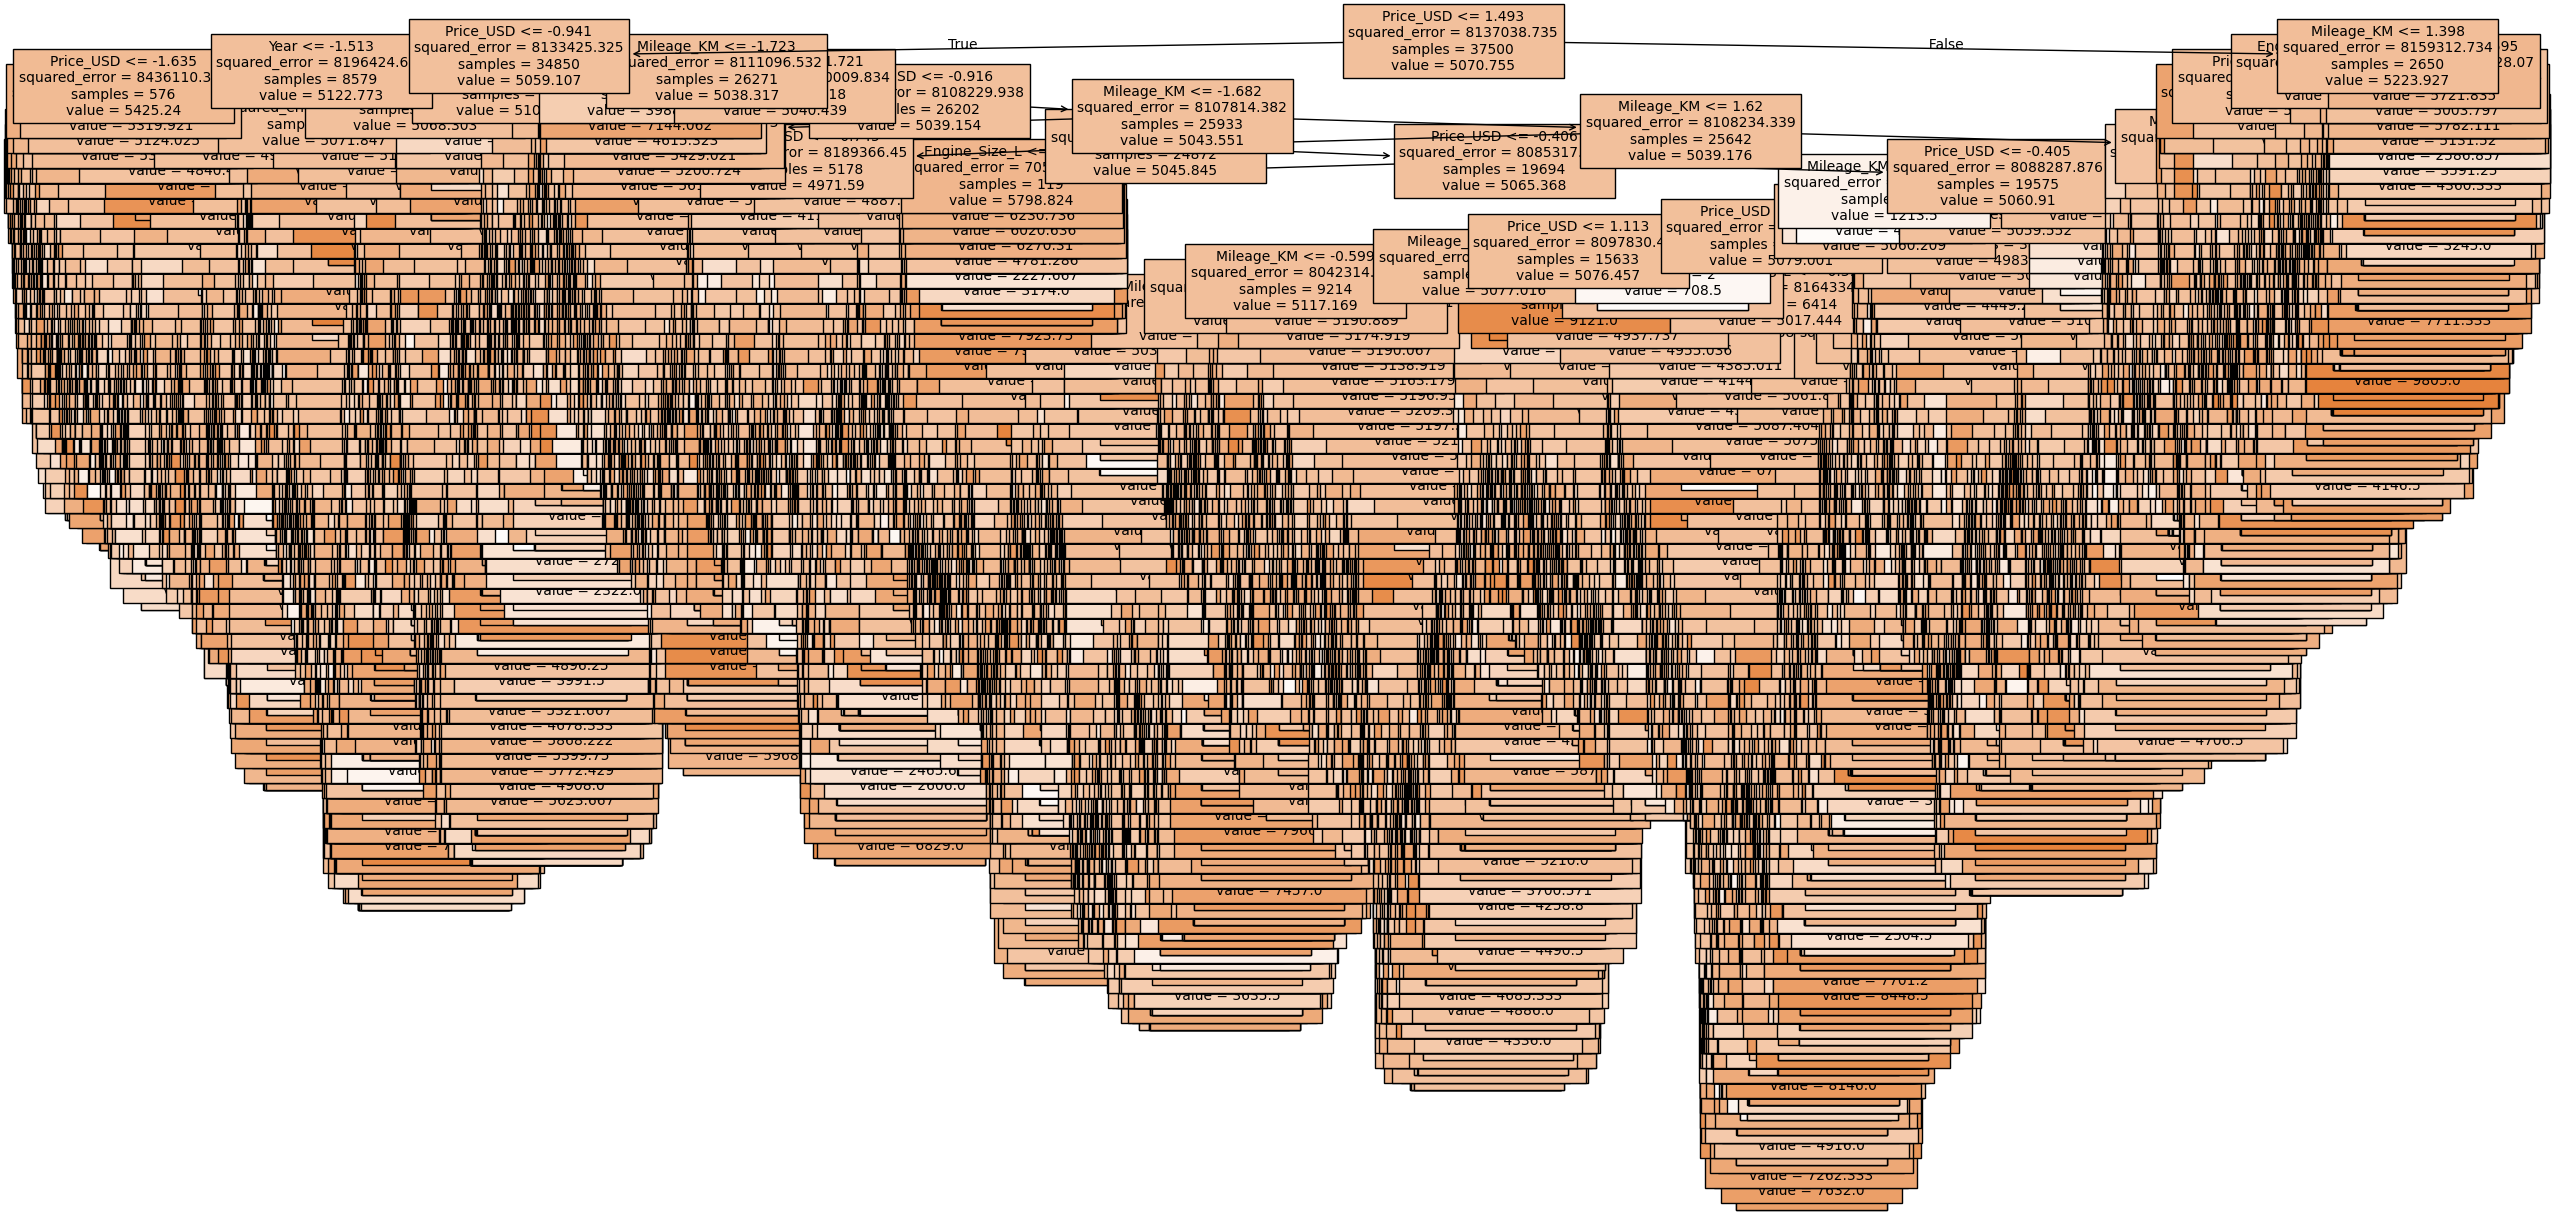

In [ ]:
plt.figure(figsize=(30,15))

# Define the feature names explicitly for plotting
feature_names_for_plot = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

tree.plot_tree(reg_tree_model, feature_names=feature_names_for_plot, filled=True, fontsize= 10)
plt.show()

# _Model Performance_

In [ ]:
# Make predictions on the test set
y_pred_reg_tree = reg_tree_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_reg_tree = mean_absolute_error(y_test, y_pred_reg_tree)
mse_reg_tree = mean_squared_error(y_test, y_pred_reg_tree)
rmse_reg_tree = np.sqrt(mse_reg_tree)

print("Regression Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_reg_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_reg_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg_tree:.2f}")

Regression Tree Model Performance:
Mean Absolute Error (MAE): 3356.38
Mean Squared Error (MSE): 16865885.89
Root Mean Squared Error (RMSE): 4106.81


In [ ]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("K-Nearest Neighbors Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

K-Nearest Neighbors Regression Model Performance:
Mean Absolute Error (MAE): 2639.25
Mean Squared Error (MSE): 9853448.80
Root Mean Squared Error (RMSE): 3139.02


### Perbandingan Model Performance

Berikut adalah perbandingan metrik kinerja untuk model Regression Tree dan K-Nearest Neighbors (KNN):

| Metrik                 | Regression Tree      | K-Nearest Neighbors    |
| :--------------------- | :------------------- | :--------------------- |
| Mean Absolute Error (MAE)  | 3356.38              | 2639.25                |
| Mean Squared Error (MSE)   | 16865885.89          | 9853448.80             |
| Root Mean Squared Error (RMSE)| 4106.81              | 3139.02                |
|  |  |  |



Berdasarkan perbandingan performa model, K-Nearest Neighbors (KNN) menunjukkan hasil yang lebih baik dibandingkan dengan Regression Tree dalam memprediksi `Sales_Volume`. Ini terlihat dari nilai Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) yang lebih rendah pada model KNN.

# Kesimpulan

Praktikum ini bertujuan untuk membandingkan kinerja model Regression Tree dan K-Nearest Neighbors (KNN) dalam memprediksi *Sales_Volume* (volume penjualan) mobil BMW. Data penjualan BMW dari tahun 2010-2024 digunakan sebagai dataset.

Pada tahap analisis data eksploratif, ditemukan bahwa tidak ada korelasi linear yang kuat antara *Sales_Volume* dengan fitur numerik seperti *Year*, *Engine_Size_L*, *Mileage_KM*, dan *Price_USD*. Distribusi *Sales_Volume* cenderung seragam. Data kemudian dibagi menjadi set pelatihan (75%) dan pengujian (25%), dan tahap *scaling* dilakukan dengan menggunakan standar scaler karena data yang digunakan memiliki skew normal.

Dua model, *DecisionTreeRegressor* dan *KNeighborsRegressor*, dilatih menggunakan fitur numerik (*Year*, *Engine_Size_L*, *Mileage_KM*, *Price_USD*) dan dievaluasi menggunakan metrik *Mean Absolute Error (MAE)*, *Mean Squared Error (MSE)*, dan *Root Mean Squared Error (RMSE)*.

**Hasil perbandingan menunjukkan bahwa model K-Nearest Neighbors (KNN) memiliki performa yang lebih baik dibandingkan dengan Regression Tree.** Ini terlihat dari nilai MAE, MSE, dan RMSE yang lebih rendah pada model KNN. Meskipun analisis korelasi awal menunjukkan tidak ada hubungan linear yang kuat antara variabel prediktor dan variabel target, KNN mampu menangkap pola yang lebih baik, mungkin karena kemampuannya dalam memodelkan hubungan non-linear dan lokal dalam data. Ini mengindikasikan bahwa KNN lebih cocok untuk dataset ini dalam memprediksi *Sales_Volume*.

# Referensi

Breiman, L., Friedman, J. H., Olshen, R. A., & Stone, C. J. (1984). Classification and regression trees. Wadsworth International Group.

Chi, Y., & Guan, L. (2022). Asymptotic properties of classification and regression trees. arXiv preprint arXiv:2104.13881.

Dingare, S., Sunkara, R., & Kumar, M. N. (2024). Big Mart sales prediction using machine learning. EAI Endorsed Transactions on Internet of Things, 10, 6453.

Gayvoronskaya, T., & Meert, W. (2024). A hybrid machine learning and seasonal time series framework for variant-level monthly car sales forecasting in the automotive industry. Journal of Information Systems Engineering and Management, 9(4), 9018.

Geurts, P., & Louppe, G. (2017). Arbres CART et forêts aléatoires, importance et sélection de variables. arXiv preprint arXiv:1610.08203.

Hyun, J., Lee, S., & Ryu, H. (2024). Random kernel k-nearest neighbors regression. Frontiers in Big Data, 7, 1402384.

Kar, S. (2024). Detection of network security traffic anomalies based on machine learning KNN method. Journal of Artificial Intelligence General Science, 5(1), 1-12.

Kovács, G., & Ott, N. (2024). Assessment of ridge regression-based machine learning model for the prediction of automotive sales based on the customer requirements. Computer Science and Information Systems, 21(3), 2132-4.

Mohanty, M., Satapathy, S., & Pradhan, S. K. (2024). Exploring the power and practical applications of K-nearest neighbours (KNN) in machine learning. Journal of Computational Analysis and Intelligence, 2(1), 28-45.

Patel, H., Prajapati, P., & Panchal, K. (2024). Sales prediction based on machine learning approach: Support vector machine, XGBoost and random forest. HSET Journal, 7(1), 120-135.

Perea, H., Mihai, D., & Beşer, E. (2021). Automotive OEM demand forecasting: A comparative study of forecasting algorithms and strategies. Applied Sciences, 11(15), 6787.

Pourrajabi, M., Rogers, D. L., & Zhang, B. (2022). A machine learning-based framework for forecasting sales of new products with short life cycles using deep neural networks. International Journal of Forecasting, 38(4), 1364-1377.

Puri, P., Jain, A., & Kumar, S. (2022). Linear regression and artificial neural networks based efficient sales forecasting model with increased prediction accuracy. IEEE Access, 10, 85619.

Seguer-Sánchez, J., Fernández-Crespo, M., & Martínez, G. (2021). Artificial intelligence based prediction models: Sales forecasting application in automotive aftermarket. Journal of Intelligent & Fuzzy Systems, 41(3), 5243-5257.

Taylor, J., & Tibshirani, R. J. (2021). Tree-values: Selective inference for regression trees. Journal of Machine Learning Research, 22(1), 1-45.

Vu, L., Nguyen, V. H., & Nguyen, T. T. (2024). Evaluating the performance of random forest, decision tree, support vector regression and gradient boosting for streamflow prediction. Can Tho University Journal of Science, 60(3), 112-124.

Zamit, E., & Kumar, R. (2019). Time series forecasting with KNN in R: The tsfknn package. The R Journal, 11(1), 4-22.

